In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)


df = pd.read_csv('/home/achint/Mobility data for public hdm/canada_healthcare.csv')

# geo_df = pd.read_csv('/home/achint/Mobility data for public hdm/geometry.csv')

In [2]:
df1 = df
# df1 = df.loc[df['region_x'] == 'BC']     #Use this code in order to find the results for provinces
# df1 = df.loc[df['city_x'] == 'Toronto']   #Use this to find the results for cities

In [3]:
df1.reset_index(inplace = True)

In [4]:
df1

,level_0,Unnamed: 0,Unnamed: 0.1,placekey,parent_placekey_x,location_name_x,street_address_x,city_x,region_x,postal_code_x,iso_country_code_x,safegraph_brand_ids_x,brands_x,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_home_aggregation,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_total_visits,normalized_visits_by_total_visitors,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,parent_placekey_y,location_name_y,safegraph_brand_ids_y,brands_y,top_category,sub_category,naics_code_x,latitude,longitude,street_address_y,city_y,region_y,postal_code_y,iso_country_code_y,phone_number,open_hours,category_tags_x,opened_on,closed_on,tracking_closed_since,geometry_type,polygon_wkt,polygon_class,includes_parking_lot,is_synthetic,enclosed,wkt_area_sq_meters,index,naics_code_y,category_tags_y,category,category_1,category_2,category_3,category_4,category_5
0,0,0,0,222-222@65w-qkr-x89,NaN,Fondation Du Centre Hospitalier Regional Du Su...,387 Rue Victoria,Salaberry-de-valleyfield,QC,J6T 1B7,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,10,7,"[0,1,3,0,0,5,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:24700120,"{""CA:24663033"":4,""CA:24710190"":4,""CA:24700144"":4}","{""CA:24710022"":4,""CA:24700004"":4}","{""CA:24700133"":4}","{""CA"":6}",7127.0,72.0,"{""<5"":0,""5-10"":2,""11-20"":1,""21-60"":2,""61-120"":...","{""McDonald's"":14,""SAQ"":14}","{""Metro"":43,""SAQ"":29,""Shell Oil"":29,""Harnois É...","{""android"":4,""ios"":5}",699.882808,4.788935e-06,6.626535e-06,0.000987,0.001776,NaN,Fondation Du Centre Hospitalier Regional Du Su...,NaN,NaN,General Medical and Surgical Hospitals,General Medical and Surgical Hospitals,622110,45.255936,-74.140285,387 Rue Victoria,Salaberry-De-Valleyfield,QC,J6T 1B7,CA,1.450377e+10,NaN,NaN,NaN,NaN,2019-07-01,POLYGON,"POLYGON ((-74.140372 45.255965, -74.140207 45....",OWNED_POLYGON,False,False,False,149,174,622110,NaN,['Hospitals'],Hospitals,NaN,NaN,NaN,NaN
1,1,1,1,222-222@65w-qkr-x89,NaN,Fondation Du Centre Hospitalier Regional Du Su...,387 Rue Victoria,Salaberry-De-Valleyfield,QC,J6T 1B7,CA,NaN,NaN,2022-05-02T00:00:00-04:00,2022-05-09T00:00:00-04:00,8,3,"[1,1,2,1,2,1,0]","[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:24700120,"{""CA:24700094"":5,""CA:24750197"":4,""CA:24700084"":4}",{},"{""CA:24750197"":4}","{""CA"":4}",NaN,191.5,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":1,""61-120"":...",{},{},"{""android"":0,""ios"":0}",377.508017,5.284313e-06,3.914017e-06,0.000688,0.001258,NaN,Fondation Du Centre Hospitalier Regional Du Su...,NaN,NaN,General Medical and Surgical Hospitals,General Medical and Surgical Hospitals,622110,45.255936,-74.140285,387 Rue Victoria,Salaberry-De-Valleyfield,QC,J6T 1B7,CA,1.450377e+10,NaN,NaN,NaN,NaN,2019-07-01,POLYGON,"POLYGON ((-74.140372 45.255965, -74.140207 45....",OWNED_POLYGON,False,False,False,149,175,622110,NaN,['Hospitals'],Hospitals,NaN,NaN,NaN,NaN
2,2,2,2,222-222@65w-qkr-x89,NaN,Fondation Du Centre Hospitalier Regional Du Su...,387 Rue Victoria,Salaberry-de-valleyfield,QC,J6T 1B7,CA,NaN,NaN,2020-07-13T00:00:00-04:00,2020-07-20T00:00:00-04:00,9,4,"[2,1,3,1,0,1,1]","[0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0...",CA:24700120,"{""CA:24700160"":5,""CA:24700088"":4}",{},"{""CA:24700135"":4}","{""CA"":4}",NaN,223.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":2,""61-120"":...",{},{},"{""android"":0,""ios"":0}",899.427786,5.058422e-06,5.209059e-06,0.000875,0.001697,NaN,Fondation Du Centre Hospitalier Regional Du Su...,NaN,NaN,General Medical and Surgical Hospitals,General Medical and Surgical Hospitals,622110,45.255936,-74.140285,387 Rue Victoria,Salaberry-De-Valleyfield,QC,J6T 1B7,CA,1.450377e+10,NaN,NaN,NaN,NaN,2019-07-01,POLYGON,"POLYGON ((-74.140372

In [5]:
surgical = df1

In [6]:
surgical['date_range_start'] = pd.to_datetime(surgical["date_range_start"].str[:10])

surgical['year'] = pd.DatetimeIndex(surgical['date_range_start']).year

surgical['month'] = pd.DatetimeIndex(surgical['date_range_start']).month
surgical["month"] = surgical.month.map("{:02}".format)

surgical['day'] = pd.DatetimeIndex(surgical['date_range_start']).day
surgical["day"] = surgical.day.map("{:02}".format)
surgical["period"] = surgical["year"].astype(str) + surgical["month"].astype(str) + surgical["day"].astype(str)
surgical['period'] = surgical['period'].astype(int)

surgical = surgical.sort_values(by = ['period'])

In [7]:
df3 = pd.DataFrame(surgical.groupby('placekey').size(), columns = ['count'])

In [8]:
df4 = df3.loc[df3['count'] >= 52]

In [9]:
df4.to_csv('ontario_unique_placekeys.csv')
df4 = pd.read_csv('ontario_unique_placekeys.csv')

In [10]:
df4 = surgical.merge(df4, on = "placekey")

In [11]:
df4 = df4.loc[df4['count'] >= 52]

In [12]:
df4['period'] = df4['period'].astype(int)
df4.reset_index(inplace = True, drop = True)

import matplotlib.backends.backend_pdf
from datetime import datetime

In [13]:
df_q = pd.read_csv('/home/achint/Mobility data for public hdm/can_scores_quintiles_EN.csv')

In [14]:
data = pd.read_csv('/home/achint/msdi_index.csv')

In [15]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [16]:
surgical

,level_0,Unnamed: 0,Unnamed: 0.1,placekey,parent_placekey_x,location_name_x,street_address_x,city_x,region_x,postal_code_x,iso_country_code_x,safegraph_brand_ids_x,brands_x,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_home_aggregation,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_total_visits,normalized_visits_by_total_visitors,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,parent_placekey_y,location_name_y,safegraph_brand_ids_y,brands_y,top_category,sub_category,naics_code_x,latitude,longitude,street_address_y,city_y,region_y,postal_code_y,iso_country_code_y,phone_number,open_hours,category_tags_x,opened_on,closed_on,tracking_closed_since,geometry_type,polygon_wkt,polygon_class,includes_parking_lot,is_synthetic,enclosed,wkt_area_sq_meters,index,naics_code_y,category_tags_y,category,category_1,category_2,category_3,category_4,category_5,year,month,day,period
33376,33376,35298,35298,zzw-222@3wz-4k7-bff,NaN,Rockyview General Hospital,7007 14 Street South West,Calgary,AB,T2V 1P9,CA,NaN,NaN,2018-12-24,2018-12-31T00:00:00-07:00,7,7,"[0,0,0,0,0,0,7]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:48060545,"{""CA:48060607"":6,""CA:48061942"":4}",{},{},"{""CA"":7}",13457.0,243.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":2,""61-120"":...",{},{},"{""android"":4,""ios"":4}",6075.876736,2.194564e-04,0.000271,0.058333,0.059322,NaN,Rockyview General Hospital,NaN,NaN,General Medical and Surgical Hospitals,General Medical and Surgical Hospitals,622110,50.990313,-114.097396,7007 14 St SW,Calgary,AB,T2V 1P9,CA,NaN,NaN,NaN,NaN,NaN,2019-07-01,POLYGON,"POLYGON ((-114.096337 50.989937, -114.096847 5...",SHARED_POLYGON,False,False,False,32695,86723,622110,NaN,['Hospitals'],Hospitals,NaN,NaN,NaN,NaN,2018,12,24,20181224
38991,38991,41072,41072,222-222@3vt-vgw-d7q,NaN,Saskatoon Health Region,701 Queen Street,Saskatoon,SK,S7K 0M7,CA,NaN,NaN,2018-12-24,2018-12-31T00:00:00-06:00,1,1,"[0,0,0,0,0,0,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:47110058,{},{},"{""CA:47110581"":4}",{},NaN,107.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",1187.141994,1.581528e-04,0.000182,0.019608,0.020408,NaN,Saskatoon Health Region,NaN,NaN,General Medical and Surgical Hospitals,General Medical and Surgical Hospitals,622110,52.136163,-106.653222,701 Queen St,Saskatoon,SK,S7K 0M7,CA,1.306656e+10,NaN,NaN,NaN,NaN,2019-07-01,POLYGON,"POLYGON ((-106.655234 52.135784, -106.655022 5...",SHARED_POLYGON,False,False,False,13738,104880,622110,NaN,['Hospitals'],Hospitals,NaN,NaN,NaN,NaN,2018,12,24,20181224
70944,70944,74306,74306,223-222@669-ykk-8d9,NaN,Centre Hospitalier Pierre Boucher,1333 Boulevard Jacques Cartier Est,Longueuil,QC,J4M 2A5,CA,NaN,NaN,2018-12-24,2018-12-31T00:00:00-05:00,2,2,"[0,0,0,0,0,0,2]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:24580733,{},{},{},{},NaN,38.5,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",2883.639543,5.202372e-05,0.000058,0.012903,0.013072,NaN,Hospitals,NaN,NaN,General Medical and Surgical Hospitals,General Medical and Surgical Hospitals,622110,45.538289,-73.458535,1333 Boul Jacques-Cartier E,Longueuil,QC,J4M 2A5,CA,NaN,NaN,NaN,NaN,NaN,2019-07-01,POLYGON,"POLYGON ((-73.458825 45.537819, -73.45927 45.5...",SHARED_POLYGON,False,False,False,13006,187980,622110,NaN,['Hospitals'],Hospitals,NaN,NaN,NaN,NaN,2018,12,24,20181224
40886,40886,42995,42995,zzw-223@3x2-dbf-whq,NaN,Community Asthma Care Centre,2268 Pandosy Street,Kelowna,BC,V1Y 1T2,CA,NaN,NaN,2018-12-24,2018-12-31T00:00:00-08:00,1,1,"[0,0,0,0,0,0,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:59350058,{},{},{},NaN,NaN,312.0,"{""<5"":0,""5-10"":0,""11-20"":0,""

In [17]:
data.rename(columns = {'DA': 'visitor_home_cbgs'},inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56590 entries, 0 to 56589
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_home_cbgs  56590 non-null  int64  
 1   SCOREMAT           52734 non-null  float64
 2   SCORESOC           52734 non-null  float64
 3   QUINTMAT           52734 non-null  float64
 4   QUINTSOC           52734 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.2 MB


In [19]:
df_q.rename(columns = {'PRCDDA': 'visitor_home_cbgs'},inplace = True)
df_q = df_q[['visitor_home_cbgs','Dissemination area (DA) Population','Province']]

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
home_panel_df = pd.read_csv('/home/achint/Mobility data for public hdm/weekly_home_panel_canada.csv')

In [22]:
home_panel_df

,Unnamed: 0,date_range_start,date_range_end,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime
0,20372,2019-05-20T00:00:00-03:00,2019-05-27T00:00:00-03:00,nb,CA,CA:13060061,1,0
1,20373,2019-05-20T00:00:00-03:00,2019-05-27T00:00:00-03:00,nb,CA,CA:13020055,0,1
2,20374,2019-05-20T00:00:00-03:00,2019-05-27T00:00:00-03:00,nb,CA,CA:13060018,1,0
3,20375,2019-05-20T00:00:00-03:00,2019-05-27T00:00:00-03:00,nb,CA,CA:13010137,1,0
4,20376,2019-05-20T00:00:00-03:00,2019-05-27T00:00:00-03:00,nb,CA,CA:13020053,3,3
...,...,...,...,...,...,...,...,...
6778432,26548,2020-07-06T00:00:00-07:00,2020-07-13T00:00:00-07:00,yt,CA,CA:60010181,2,2
6778433,26549,2020-06-22T00:00:00-07:00,2020-06-29T00:00:00-07:00,yt,CA,CA:60010252,17,14
6778434,26550,2020-06-22T00:00:00-07:00,2020-06-29T00:00:00-07:00,yt,CA,CA:60010276,1,1
6778435,26551,2020-06-22T00:00:00-07:00,2020-06-29T00:00:00-07:00,yt,CA,CA:60010257,4,4


In [23]:
home_panel_df['date_range_start'] = pd.to_datetime(home_panel_df["date_range_start"].str[:10])

In [24]:
home_panel_df['year'] = pd.DatetimeIndex(home_panel_df['date_range_start']).year

home_panel_df['month'] = pd.DatetimeIndex(home_panel_df['date_range_start']).month
home_panel_df["month"] = home_panel_df.month.map("{:02}".format)

In [25]:
hp = home_panel_df[home_panel_df.census_block_group.str[:3] == 'CA:']
hp['census_block_group'] = hp['census_block_group'].str[3:]
hp['census_block_group'] = hp['census_block_group'].astype(int)

In [26]:
hp

,Unnamed: 0,date_range_start,date_range_end,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,year,month
0,20372,2019-05-20,2019-05-27T00:00:00-03:00,nb,CA,13060061,1,0,2019,05
1,20373,2019-05-20,2019-05-27T00:00:00-03:00,nb,CA,13020055,0,1,2019,05
2,20374,2019-05-20,2019-05-27T00:00:00-03:00,nb,CA,13060018,1,0,2019,05
3,20375,2019-05-20,2019-05-27T00:00:00-03:00,nb,CA,13010137,1,0,2019,05
4,20376,2019-05-20,2019-05-27T00:00:00-03:00,nb,CA,13020053,3,3,2019,05
...,...,...,...,...,...,...,...,...,...,...
6778432,26548,2020-07-06,2020-07-13T00:00:00-07:00,yt,CA,60010181,2,2,2020,07
6778433,26549,2020-06-22,2020-06-29T00:00:00-07:00,yt,CA,60010252,17,14,2020,06
6778434,26550,2020-06-22,2020-06-29T00:00:00-07:00,yt,CA,60010276,1,1,2020,06
6778435,26551,2020-06-22,2020-06-29T00:00:00-07:00,yt,CA,60010257,4,4,2020,06


In [27]:
hp = hp.drop(['Unnamed: 0'], axis = 1)

In [28]:
hp = hp[['date_range_start','region','census_block_group','number_devices_residing','number_devices_primary_daytime']]

In [29]:
hp.rename(columns = {'census_block_group': 'visitor_home_cbgs'},inplace = True)

In [30]:
import json

In [31]:
hp

,date_range_start,region,visitor_home_cbgs,number_devices_residing,number_devices_primary_daytime
0,2019-05-20,nb,13060061,1,0
1,2019-05-20,nb,13020055,0,1
2,2019-05-20,nb,13060018,1,0
3,2019-05-20,nb,13010137,1,0
4,2019-05-20,nb,13020053,3,3
...,...,...,...,...,...
6778432,2020-07-06,yt,60010181,2,2
6778433,2020-06-22,yt,60010252,17,14
6778434,2020-06-22,yt,60010276,1,1
6778435,2020-06-22,yt,60010257,4,4


In [32]:
hp['total_devices'] = 0
hp['total_devices'] = hp['number_devices_residing'] + hp['number_devices_primary_daytime']

In [33]:
import json
def append_cbg_population(df, cbg_fips_col='visitor_home_cbg'):
  cbg_b01 = df_q
  cbg_pops = cbg_b01.groupby(['visitor_home_cbgs'])['Dissemination area (DA) Population'].sum().to_frame(name='cbg_pop').reset_index()
  df = pd.merge(df, cbg_pops, left_on=cbg_fips_col ,right_on='visitor_home_cbgs')
  return(df)

def vertically_explode_json(df_, json_column='visitor_home_cbgs', key_col_name='visitor_home_cbg', value_col_name='cbg_visitor_count'):

    df = df_.copy()
    if(df.index.unique().shape[0] < df.shape[0]):
        raise("ERROR -- non-unique index found")
    df[json_column+'_dict'] = [json.loads(cbg_json) for cbg_json in df[json_column]]
    all_sgpid_cbg_data = [] # each cbg data point will be one element in this list
    for index, row in df.iterrows():
      # extract each key:value inside each visitor_home_cbg dict (2 nested loops) 
      this_sgpid_cbg_data = [ {'orig_index' : index, key_col_name:key, value_col_name:value} for key,value in row[json_column+'_dict'].items() ]
      all_sgpid_cbg_data = all_sgpid_cbg_data + this_sgpid_cbg_data
    output = pd.DataFrame(all_sgpid_cbg_data)
    output.set_index('orig_index', inplace=True)
    return(output)

def explode_visitor_home_cbg(df, json_column='visitor_home_cbgs', key_col_name='visitor_home_cbg', value_col_name='cbg_visitor_count', keep_index=False):
    if(keep_index):
        df['index_original'] = df.index
    df = df.dropna(subset = [json_column]).copy() # Drop nan jsons 
    df.reset_index(drop=True, inplace=True) # Every row must have a unique index
    df_exp = vertically_explode_json(df, json_column=json_column, key_col_name=key_col_name, value_col_name=value_col_name)
    df = df.merge(df_exp, left_index=True, right_index=True).reset_index(drop=True)
    return(df)

In [34]:
surgical.reset_index(inplace = True, drop = True)

In [35]:
surg = surgical[['placekey','date_range_start','poi_cbg','visitor_home_cbgs','visitor_home_aggregation']]

In [36]:
surg

,placekey,date_range_start,poi_cbg,visitor_home_cbgs,visitor_home_aggregation
0,zzw-222@3wz-4k7-bff,2018-12-24,CA:48060545,"{""CA:48060607"":6,""CA:48061942"":4}",{}
1,222-222@3vt-vgw-d7q,2018-12-24,CA:47110058,{},{}
2,223-222@669-ykk-8d9,2018-12-24,CA:24580733,{},{}
3,zzw-223@3x2-dbf-whq,2018-12-24,CA:59350058,{},{}
4,zzw-222@665-y25-ht9,2018-12-24,CA:35180583,{},{}
...,...,...,...,...,...
123869,222-222@665-x3j-v75,2022-05-09,CA:35250545,"{""CA:35250116"":4,""CA:35290286"":4}","{""CA:35250003"":4,""CA:35250060"":4}"
123870,223-222@66b-2f8-qfz,2022-05-09,CA:24660854,"{""CA:24660788"":4,""CA:24660620"":4,""200910535091...","{""CA:24660192"":5,""CA:24660194"":4,""CA:24660174""..."
123871,222-223@65x-9jn-zpv,2022-05-09,CA:35060253,"{""CA:24810313"":5,""CA:24820078"":4,""CA:35061862""...","{""CA:35060005"":4,""CA:35060047"":4,""CA:35060063""..."
123872,222-223@64m-xq4-5mk,2022-05-09,CA:12090638,"{""CA:12090638"":7,""CA:12090630"":4,""CA:12090633""...","{""CA:12090013"":8,""CA:12090012"":8,""CA:12090015""..."


In [37]:
visitor_home_df = explode_visitor_home_cbg(surg)

In [38]:
visitor_home_df

,placekey,date_range_start,poi_cbg,visitor_home_cbgs,visitor_home_aggregation,visitor_home_cbg,cbg_visitor_count
0,zzw-222@3wz-4k7-bff,2018-12-24,CA:48060545,"{""CA:48060607"":6,""CA:48061942"":4}",{},CA:48060607,6
1,zzw-222@3wz-4k7-bff,2018-12-24,CA:48060545,"{""CA:48060607"":6,""CA:48061942"":4}",{},CA:48061942,4
2,zzw-222@66b-mct-xbk,2018-12-24,CA:24230204,"{""CA:24230200"":4}",{},CA:24230200,4
3,zzw-224@63v-m5v-zzz,2018-12-24,CA:35300142,"{""CA:35250509"":4}",{},CA:35250509,4
4,222-224@66b-2dm-8gk,2018-12-24,CA:24661148,"{""CA:24661655"":4}",{},CA:24661655,4
...,...,...,...,...,...,...,...
537596,222-223@64m-xq4-5mk,2022-05-09,CA:12090638,"{""CA:12090638"":7,""CA:12090630"":4,""CA:12090633""...","{""CA:12090013"":8,""CA:12090012"":8,""CA:12090015""...",CA:12090695,4
537597,222-223@64m-xq4-5mk,2022-05-09,CA:12090638,"{""CA:12090638"":7,""CA:12090630"":4,""CA:12090633""...","{""CA:12090013"":8,""CA:12090012"":8,""CA:12090015""...",CA:12090202,4
537598,222-223@64m-xq4-5mk,2022-05-09,CA:12090638,"{""CA:12090638"":7,""CA:12090630"":4,""CA:12090633""...","{""CA:12090013"":8,""CA:12090012"":8,""CA:12090015""...",CA:12090929,4
537599,222-223@64m-xq4-5mk,2022-05-09,CA:12090638,"{""CA:12090638"":7,""CA:12090630"":4,""CA:12090633""...","{""CA:12090013"":8,""CA:12090012"":8,""CA:12090015""...",CA:12090611,4


In [39]:
visitor_home_df.drop(['visitor_home_cbgs','visitor_home_aggregation'], axis = 1, inplace = True)

In [40]:
visitor_home_df

,placekey,date_range_start,poi_cbg,visitor_home_cbg,cbg_visitor_count
0,zzw-222@3wz-4k7-bff,2018-12-24,CA:48060545,CA:48060607,6
1,zzw-222@3wz-4k7-bff,2018-12-24,CA:48060545,CA:48061942,4
2,zzw-222@66b-mct-xbk,2018-12-24,CA:24230204,CA:24230200,4
3,zzw-224@63v-m5v-zzz,2018-12-24,CA:35300142,CA:35250509,4
4,222-224@66b-2dm-8gk,2018-12-24,CA:24661148,CA:24661655,4
...,...,...,...,...,...
537596,222-223@64m-xq4-5mk,2022-05-09,CA:12090638,CA:12090695,4
537597,222-223@64m-xq4-5mk,2022-05-09,CA:12090638,CA:12090202,4
537598,222-223@64m-xq4-5mk,2022-05-09,CA:12090638,CA:12090929,4
537599,222-223@64m-xq4-5mk,2022-05-09,CA:12090638,CA:12090611,4


In [41]:
vhdf = visitor_home_df[visitor_home_df.poi_cbg.str[:3] == 'CA:']
vhdf['poi_cbg'] = vhdf['poi_cbg'].str[3:]
vhdf['poi_cbg'] = vhdf['poi_cbg'].astype(int)

In [42]:
vhdf = vhdf[vhdf.visitor_home_cbg.str[:3] == 'CA:']
vhdf['visitor_home_cbg'] = vhdf['visitor_home_cbg'].str[3:]
vhdf['visitor_home_cbg'] = vhdf['visitor_home_cbg'].astype(int)

In [43]:
vhdf.rename(columns = {'visitor_home_cbg':'visitor_home_cbgs'}, inplace = True)

In [44]:
vhdf

,placekey,date_range_start,poi_cbg,visitor_home_cbgs,cbg_visitor_count
0,zzw-222@3wz-4k7-bff,2018-12-24,48060545,48060607,6
1,zzw-222@3wz-4k7-bff,2018-12-24,48060545,48061942,4
2,zzw-222@66b-mct-xbk,2018-12-24,24230204,24230200,4
3,zzw-224@63v-m5v-zzz,2018-12-24,35300142,35250509,4
4,222-224@66b-2dm-8gk,2018-12-24,24661148,24661655,4
...,...,...,...,...,...
537596,222-223@64m-xq4-5mk,2022-05-09,12090638,12090695,4
537597,222-223@64m-xq4-5mk,2022-05-09,12090638,12090202,4
537598,222-223@64m-xq4-5mk,2022-05-09,12090638,12090929,4
537599,222-223@64m-xq4-5mk,2022-05-09,12090638,12090611,4


In [45]:
# vhdf = vhdf[vhdf.cbg_visitor_count >= 5]

In [46]:
vhdf.reset_index(drop = True, inplace = True)

In [47]:
hp

,date_range_start,region,visitor_home_cbgs,number_devices_residing,number_devices_primary_daytime,total_devices
0,2019-05-20,nb,13060061,1,0,1
1,2019-05-20,nb,13020055,0,1,1
2,2019-05-20,nb,13060018,1,0,1
3,2019-05-20,nb,13010137,1,0,1
4,2019-05-20,nb,13020053,3,3,6
...,...,...,...,...,...,...
6778432,2020-07-06,yt,60010181,2,2,4
6778433,2020-06-22,yt,60010252,17,14,31
6778434,2020-06-22,yt,60010276,1,1,2
6778435,2020-06-22,yt,60010257,4,4,8


In [48]:
vhdf2 = pd.merge(vhdf,hp, how='left', left_on=['visitor_home_cbgs','date_range_start'], right_on = ['visitor_home_cbgs','date_range_start'])

In [49]:
vhdf2

,placekey,date_range_start,poi_cbg,visitor_home_cbgs,cbg_visitor_count,region,number_devices_residing,number_devices_primary_daytime,total_devices
0,zzw-222@3wz-4k7-bff,2018-12-24,48060545,48060607,6,NaN,NaN,NaN,NaN
1,zzw-222@3wz-4k7-bff,2018-12-24,48060545,48061942,4,NaN,NaN,NaN,NaN
2,zzw-222@66b-mct-xbk,2018-12-24,24230204,24230200,4,qc,4.0,4.0,8.0
3,zzw-224@63v-m5v-zzz,2018-12-24,35300142,35250509,4,on,1.0,1.0,2.0
4,222-224@66b-2dm-8gk,2018-12-24,24661148,24661655,4,qc,3.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...
534514,222-223@64m-xq4-5mk,2022-05-09,12090638,12090695,4,ns,55.0,53.0,108.0
534515,222-223@64m-xq4-5mk,2022-05-09,12090638,12090202,4,ns,152.0,186.0,338.0
534516,222-223@64m-xq4-5mk,2022-05-09,12090638,12090929,4,ns,88.0,52.0,140.0
534517,222-223@64m-xq4-5mk,2022-05-09,12090638,12090611,4,ns,107.0,83.0,190.0


In [50]:
vhdf2.drop(['region','total_devices','number_devices_primary_daytime'],axis = 1, inplace = True)

In [51]:
vhdf2['number_devices_residing'].fillna(vhdf2['number_devices_residing'].mode()[0], inplace=True)

In [52]:
vhdf2

,placekey,date_range_start,poi_cbg,visitor_home_cbgs,cbg_visitor_count,number_devices_residing
0,zzw-222@3wz-4k7-bff,2018-12-24,48060545,48060607,6,5.0
1,zzw-222@3wz-4k7-bff,2018-12-24,48060545,48061942,4,5.0
2,zzw-222@66b-mct-xbk,2018-12-24,24230204,24230200,4,4.0
3,zzw-224@63v-m5v-zzz,2018-12-24,35300142,35250509,4,1.0
4,222-224@66b-2dm-8gk,2018-12-24,24661148,24661655,4,3.0
...,...,...,...,...,...,...
534514,222-223@64m-xq4-5mk,2022-05-09,12090638,12090695,4,55.0
534515,222-223@64m-xq4-5mk,2022-05-09,12090638,12090202,4,152.0
534516,222-223@64m-xq4-5mk,2022-05-09,12090638,12090929,4,88.0
534517,222-223@64m-xq4-5mk,2022-05-09,12090638,12090611,4,107.0


In [53]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54796 entries, 0 to 54795
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   visitor_home_cbgs                   54796 non-null  int64 
 1   Dissemination area (DA) Population  54796 non-null  int64 
 2   Province                            54796 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [54]:
vhdf3 = pd.merge(vhdf2, df_q, on = 'visitor_home_cbgs')

In [55]:
vhdf3

,placekey,date_range_start,poi_cbg,visitor_home_cbgs,cbg_visitor_count,number_devices_residing,Dissemination area (DA) Population,Province
0,zzw-222@3wz-4k7-bff,2018-12-24,48060545,48060607,6,5.0,1695,Alberta
1,zzw-224@3wz-4k7-bff,2019-01-07,48060545,48060607,4,5.0,1695,Alberta
2,zzw-224@3wz-4k7-bff,2019-01-14,48060545,48060607,4,5.0,1695,Alberta
3,zzw-222@3wz-4k7-bff,2019-01-14,48060545,48060607,4,5.0,1695,Alberta
4,zzw-224@3wz-4k7-bff,2019-01-21,48060545,48060607,4,26.0,1695,Alberta
...,...,...,...,...,...,...,...,...
532999,222-224@66b-2dn-c5z,2022-05-09,24662152,35010258,4,11.0,494,Ontario
533000,223-222@3xb-28g-djv,2022-05-09,48110442,48110298,4,5.0,363,Alberta
533001,zzw-222@665-zkv-zs5,2022-05-09,35210645,35240134,4,59.0,508,Ontario
533002,zzw-222@3x9-dgp-rrk,2022-05-09,48080141,48080092,4,5.0,562,Alberta


In [56]:
vhdf3.drop(['Province'], axis = 1, inplace = True)

In [57]:
vhdf3

,placekey,date_range_start,poi_cbg,visitor_home_cbgs,cbg_visitor_count,number_devices_residing,Dissemination area (DA) Population
0,zzw-222@3wz-4k7-bff,2018-12-24,48060545,48060607,6,5.0,1695
1,zzw-224@3wz-4k7-bff,2019-01-07,48060545,48060607,4,5.0,1695
2,zzw-224@3wz-4k7-bff,2019-01-14,48060545,48060607,4,5.0,1695
3,zzw-222@3wz-4k7-bff,2019-01-14,48060545,48060607,4,5.0,1695
4,zzw-224@3wz-4k7-bff,2019-01-21,48060545,48060607,4,26.0,1695
...,...,...,...,...,...,...,...
532999,222-224@66b-2dn-c5z,2022-05-09,24662152,35010258,4,11.0,494
533000,223-222@3xb-28g-djv,2022-05-09,48110442,48110298,4,5.0,363
533001,zzw-222@665-zkv-zs5,2022-05-09,35210645,35240134,4,59.0,508
533002,zzw-222@3x9-dgp-rrk,2022-05-09,48080141,48080092,4,5.0,562


In [58]:
data.columns = ['visitor_home_cbg','Scoremat','Scoresoc','Quintmat','Quintsoc']

In [59]:
data.rename(columns = {'visitor_home_cbg':'visitor_home_cbgs'}, inplace = True)

In [60]:
data

,visitor_home_cbgs,Scoremat,Scoresoc,Quintmat,Quintsoc
0,10010165,-0.021989,-0.015800,2.0,2.0
1,10010166,-0.040530,-0.029363,1.0,2.0
2,10010167,-0.006949,-0.018033,3.0,2.0
3,10010168,-0.003233,0.016595,3.0,4.0
4,10010169,-0.042641,0.001926,1.0,3.0
...,...,...,...,...,...
56585,62080024,-0.012218,-0.019070,2.0,2.0
56586,62080025,0.080357,-0.028231,5.0,2.0
56587,62080026,0.116625,-0.054247,5.0,1.0
56588,62080027,0.125650,-0.048085,5.0,1.0


In [61]:
vdf = pd.merge(vhdf3, data, on = 'visitor_home_cbgs')

In [62]:
vdf.isnull().sum()

placekey                                  0
date_range_start                          0
poi_cbg                                   0
visitor_home_cbgs                         0
cbg_visitor_count                         0
number_devices_residing                   0
Dissemination area (DA) Population        0
Scoremat                              21450
Scoresoc                              21450
Quintmat                              21450
Quintsoc                              21450
dtype: int64

In [63]:
vdf.dropna(inplace = True)

In [64]:
vdf.reset_index(inplace = True, drop = True)

In [65]:
vdf

,placekey,date_range_start,poi_cbg,visitor_home_cbgs,cbg_visitor_count,number_devices_residing,Dissemination area (DA) Population,Scoremat,Scoresoc,Quintmat,Quintsoc
0,zzw-222@3wz-4k7-bff,2018-12-24,48060545,48060607,6,5.0,1695,-0.059083,0.049173,1.0,5.0
1,zzw-224@3wz-4k7-bff,2019-01-07,48060545,48060607,4,5.0,1695,-0.059083,0.049173,1.0,5.0
2,zzw-224@3wz-4k7-bff,2019-01-14,48060545,48060607,4,5.0,1695,-0.059083,0.049173,1.0,5.0
3,zzw-222@3wz-4k7-bff,2019-01-14,48060545,48060607,4,5.0,1695,-0.059083,0.049173,1.0,5.0
4,zzw-224@3wz-4k7-bff,2019-01-21,48060545,48060607,4,26.0,1695,-0.059083,0.049173,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
511549,222-224@66b-2dn-c5z,2022-05-09,24662152,35010258,4,11.0,494,-0.019414,0.013268,2.0,4.0
511550,223-222@3xb-28g-djv,2022-05-09,48110442,48110298,4,5.0,363,-0.035515,0.064194,1.0,5.0
511551,zzw-222@665-zkv-zs5,2022-05-09,35210645,35240134,4,59.0,508,0.009807,0.070472,4.0,5.0
511552,zzw-222@3x9-dgp-rrk,2022-05-09,48080141,48080092,4,5.0,562,-0.032022,0.019249,1.0,4.0


In [66]:
df4_merge = vdf

In [67]:
df4_merge = df4_merge.sort_values(by = ['date_range_start'])

In [68]:
df4_merge.reset_index(drop = True, inplace = True)

In [72]:
dfa = df4_merge

In [73]:
dfa

,placekey,date_range_start,poi_cbg,visitor_home_cbgs,cbg_visitor_count,number_devices_residing,Dissemination area (DA) Population,Scoremat,Scoresoc,Quintmat,Quintsoc
0,zzw-222@3wz-4k7-bff,2018-12-24,48060545,48060607,6,5.0,1695,-0.059083,0.049173,1.0,5.0
1,zzw-22w@5x6-psc-y5f,2018-12-24,59150649,59150567,4,5.0,529,0.002761,0.039241,3.0,5.0
2,222-222@3xd-sqv-zvf,2018-12-24,59530060,59530152,4,5.0,395,0.112619,0.037856,5.0,5.0
3,222-222@65x-9m5-f75,2018-12-24,35061341,24820073,4,2.0,1390,0.008982,-0.032699,4.0,2.0
4,222-222@665-zd9-92k,2018-12-24,35203185,35201854,4,5.0,1983,0.095585,0.027967,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
511549,zzw-229@3x9-cbq-gkz,2022-05-09,48062158,48050150,4,5.0,409,-0.029750,-0.041585,2.0,1.0
511550,222-222@3x9-qwh-jqf,2022-05-09,48050153,48050150,6,5.0,409,-0.029750,-0.041585,2.0,1.0
511551,226-222@665-32s-v4v,2022-05-09,35180331,35181137,4,29.0,997,-0.003429,-0.000309,3.0,3.0
511552,222-223@65w-r2x-389,2022-05-09,24710069,24700104,4,14.0,838,0.000056,0.010013,3.0,4.0


In [75]:
def compute_adjust_factor(df):
    adjust_factor = df['Dissemination area (DA) Population'] / df['Dissemination area (DA) Population'].sum() * df['number_devices_residing'].sum() /df['number_devices_residing'].clip(lower=5)
    return(adjust_factor)

In [76]:
dfa['adj_factor'] = compute_adjust_factor(dfa)

In [74]:
dfa.describe()

,poi_cbg,visitor_home_cbgs,cbg_visitor_count,number_devices_residing,Dissemination area (DA) Population,Scoremat,Scoresoc,Quintmat,Quintsoc
count,5.115540e+05,5.115540e+05,511554.000000,511554.000000,511554.000000,511554.000000,511554.000000,511554.000000,511554.000000
mean,3.714563e+07,3.710492e+07,4.162638,15.817407,1300.459015,-0.001947,0.001063,2.916400,3.031606
std,1.236291e+07,1.239031e+07,2.057228,49.979018,1863.434046,0.039052,0.039886,1.395429,1.427757
min,1.001024e+07,1.001024e+07,4.000000,0.000000,41.000000,-0.182308,-0.199824,1.000000,1.000000
25%,2.466331e+07,2.467030e+07,4.000000,5.000000,498.000000,-0.026773,-0.028009,2.000000,2.000000
50%,3.521089e+07,3.521154e+07,4.000000,6.000000,667.000000,-0.003762,-0.001901,3.000000,3.000000
75%,4.802011e+07,4.802011e+07,4.000000,12.000000,1176.000000,0.021720,0.029079,4.000000,4.000000
max,6.001027e+07,5.959003e+07,952.000000,5785.000000,21971.000000,0.244943,0.205946,5.000000,5.000000


In [77]:
dfa['visitor_adj'] = dfa['cbg_visitor_count']*dfa['adj_factor']

In [78]:
dfa

,placekey,date_range_start,poi_cbg,visitor_home_cbgs,cbg_visitor_count,number_devices_residing,Dissemination area (DA) Population,Scoremat,Scoresoc,Quintmat,Quintsoc,adj_factor,visitor_adj
0,zzw-222@3wz-4k7-bff,2018-12-24,48060545,48060607,6,5.0,1695,-0.059083,0.049173,1.0,5.0,4.123237,24.739424
1,zzw-22w@5x6-psc-y5f,2018-12-24,59150649,59150567,4,5.0,529,0.002761,0.039241,3.0,5.0,1.286839,5.147357
2,222-222@3xd-sqv-zvf,2018-12-24,59530060,59530152,4,5.0,395,0.112619,0.037856,5.0,5.0,0.960872,3.843490
3,222-222@65x-9m5-f75,2018-12-24,35061341,24820073,4,2.0,1390,0.008982,-0.032699,4.0,2.0,3.381298,13.525191
4,222-222@665-zd9-92k,2018-12-24,35203185,35201854,4,5.0,1983,0.095585,0.027967,5.0,4.0,4.823823,19.295291
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511549,zzw-229@3x9-cbq-gkz,2022-05-09,48062158,48050150,4,5.0,409,-0.029750,-0.041585,2.0,1.0,0.994929,3.979715
511550,222-222@3x9-qwh-jqf,2022-05-09,48050153,48050150,6,5.0,409,-0.029750,-0.041585,2.0,1.0,0.994929,5.969572
511551,226-222@665-32s-v4v,2022-05-09,35180331,35181137,4,29.0,997,-0.003429,-0.000309,3.0,3.0,0.418154,1.672614
511552,222-223@65w-r2x-389,2022-05-09,24710069,24700104,4,14.0,838,0.000056,0.010013,3.0,4.0,0.728039,2.912156


In [79]:
df1 = dfa.groupby(['date_range_start']).visitor_adj.sum().reset_index()

In [80]:
df1

,date_range_start,visitor_adj
0,2018-12-24,766.608330
1,2018-12-31,13884.984286
2,2019-01-07,15275.161121
3,2019-01-14,14681.471544
4,2019-01-21,10060.541567
...,...,...
172,2022-04-11,38487.715846
173,2022-04-18,40840.223971
174,2022-04-25,48123.173848
175,2022-05-02,62681.132270


In [81]:
df1['date_range_start'] = pd.to_datetime(df1['date_range_start'])

In [82]:
df1 = df1.loc[df1['date_range_start'] < '2022-02-01']

In [83]:
df1

,date_range_start,visitor_adj
0,2018-12-24,766.608330
1,2018-12-31,13884.984286
2,2019-01-07,15275.161121
3,2019-01-14,14681.471544
4,2019-01-21,10060.541567
...,...,...
158,2022-01-03,19398.164203
159,2022-01-10,20281.490633
160,2022-01-17,21594.295410
161,2022-01-24,21065.669506


In [84]:
smoothed_cases = []
for date in sorted(df1['date_range_start']):
    df1['gkv'] = np.exp(
        -(((df1['date_range_start'] - date).apply(lambda x: x.days)) ** 2) / (2 * (16 ** 2))
    )
    df1['gkv'] /= df1['gkv'].sum()
    smoothed_cases.append(round(df1['visitor_adj'] * df1['gkv']).sum())

df1['smoothed_visits'] = smoothed_cases

In [85]:
from datetime import datetime

Text(0.5, 1.0, 'Material_index_1')

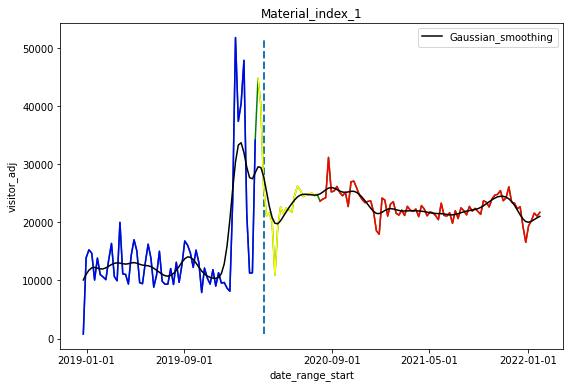

In [86]:
data = df1
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color = 'green')
sns.lineplot(x="date_range_start", y="visitor_adj", 
data=data[(data['date_range_start'] > '2018-11-30') & (data['date_range_start'] < '2020-03-01')], 
color='blue',ax = ax, ci = None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-03-01') & (data['date_range_start'] < '2020-08-01')], 
    color='yellow',ax = ax, ci=None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-08-01') & (data['date_range_start'] < '2023-01-01')], 
    color='red',ax = ax, ci = None)

# sns.lineplot(x = data['date'],y = data['7day_rolling_avg'],color = 'red', label = 'RollingAverage', ax = ax, ci = None)

sns.lineplot(x = data['date_range_start'],y = data['smoothed_visits'],color = 'black', label = 'Gaussian_smoothing', ax = ax, ci = None)

x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['visitor_adj'].min(), ymax=data['visitor_adj'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
# ax.set(ylim=(0, 200))
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Material_index_1')

Text(0.5, 1.0, 'Material_index_2')

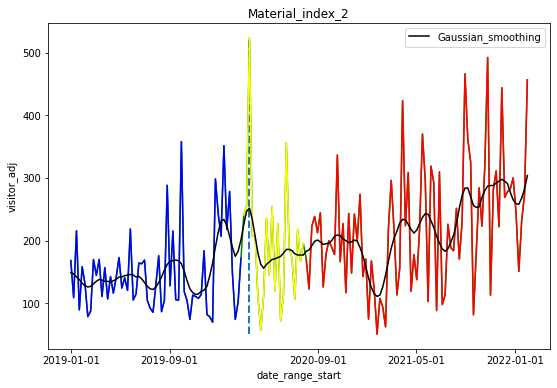

In [102]:
data = df2
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color = 'green')
sns.lineplot(x="date_range_start", y="visitor_adj", 
data=data[(data['date_range_start'] > '2018-11-30') & (data['date_range_start'] < '2020-03-01')], 
color='blue',ax = ax, ci = None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-03-01') & (data['date_range_start'] < '2020-08-01')], 
    color='yellow',ax = ax, ci=None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-08-01') & (data['date_range_start'] < '2023-01-01')], 
    color='red',ax = ax, ci = None)

# sns.lineplot(x = data['date'],y = data['7day_rolling_avg'],color = 'red', label = 'RollingAverage', ax = ax, ci = None)

sns.lineplot(x = data['date_range_start'],y = data['smoothed_visits'],color = 'black', label = 'Gaussian_smoothing', ax = ax, ci = None)

x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['visitor_adj'].min(), ymax=data['visitor_adj'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
# ax.set(ylim=(0, 200))
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Material_index_2')

Text(0.5, 1.0, 'Material_index_3')

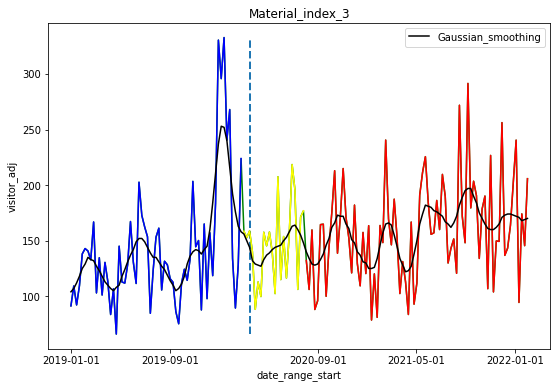

In [103]:
data = df3
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color = 'green')
sns.lineplot(x="date_range_start", y="visitor_adj", 
data=data[(data['date_range_start'] > '2018-11-30') & (data['date_range_start'] < '2020-03-01')], 
color='blue',ax = ax, ci = None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-03-01') & (data['date_range_start'] < '2020-08-01')], 
    color='yellow',ax = ax, ci=None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-08-01') & (data['date_range_start'] < '2023-01-01')], 
    color='red',ax = ax, ci = None)

# sns.lineplot(x = data['date'],y = data['7day_rolling_avg'],color = 'red', label = 'RollingAverage', ax = ax, ci = None)

sns.lineplot(x = data['date_range_start'],y = data['smoothed_visits'],color = 'black', label = 'Gaussian_smoothing', ax = ax, ci = None)

x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['visitor_adj'].min(), ymax=data['visitor_adj'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
# ax.set(ylim=(0, 200))
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Material_index_3')

Text(0.5, 1.0, 'Material_index_4')

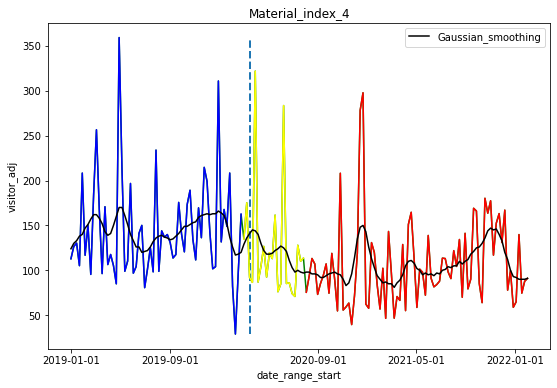

In [104]:
data = df4
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color = 'green')
sns.lineplot(x="date_range_start", y="visitor_adj", 
data=data[(data['date_range_start'] > '2018-11-30') & (data['date_range_start'] < '2020-03-01')], 
color='blue',ax = ax, ci = None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-03-01') & (data['date_range_start'] < '2020-08-01')], 
    color='yellow',ax = ax, ci=None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-08-01') & (data['date_range_start'] < '2023-01-01')], 
    color='red',ax = ax, ci = None)

# sns.lineplot(x = data['date'],y = data['7day_rolling_avg'],color = 'red', label = 'RollingAverage', ax = ax, ci = None)

sns.lineplot(x = data['date_range_start'],y = data['smoothed_visits'],color = 'black', label = 'Gaussian_smoothing', ax = ax, ci = None)

x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['visitor_adj'].min(), ymax=data['visitor_adj'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
# ax.set(ylim=(0, 800))
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Material_index_4')

Text(0.5, 1.0, 'Material_index_5')

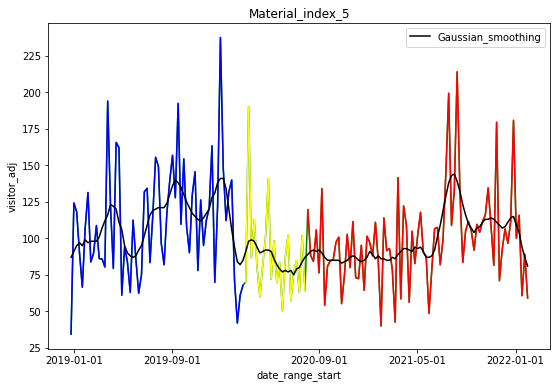

In [105]:
data = df5
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color = 'green')
sns.lineplot(x="date_range_start", y="visitor_adj", 
data=data[(data['date_range_start'] > '2018-11-30') & (data['date_range_start'] < '2020-03-01')], 
color='blue',ax = ax, ci = None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-03-01') & (data['date_range_start'] < '2020-08-01')], 
    color='yellow',ax = ax, ci=None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-08-01') & (data['date_range_start'] < '2023-01-01')], 
    color='red',ax = ax, ci = None)

# sns.lineplot(x = data['date'],y = data['7day_rolling_avg'],color = 'red', label = 'RollingAverage', ax = ax, ci = None)

sns.lineplot(x = data['date_range_start'],y = data['smoothed_visits'],color = 'black', label = 'Gaussian_smoothing', ax = ax, ci = None)

x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

# ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['real_scale'].min(), ymax=data['real_scale'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
# ax.set(ylim=(0, 800))
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Material_index_5')

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

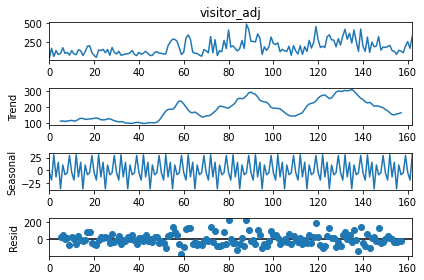

In [107]:
decompose = seasonal_decompose(df1['visitor_adj'],model='additive', period=10)
decompose.plot()
plt.show()

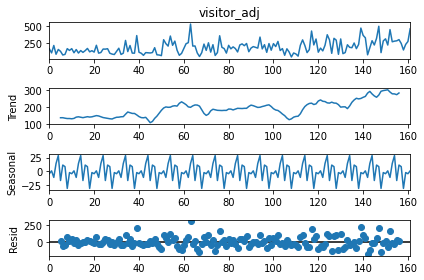

In [108]:
decompose = seasonal_decompose(df2['visitor_adj'],model='additive', period=10)
decompose.plot()
plt.show()

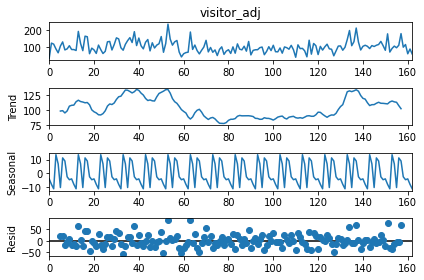

In [109]:
decompose = seasonal_decompose(df5['visitor_adj'],model='additive', period=10)
decompose.plot()
plt.show()

Text(0.5, 1.0, 'Social_index_1')

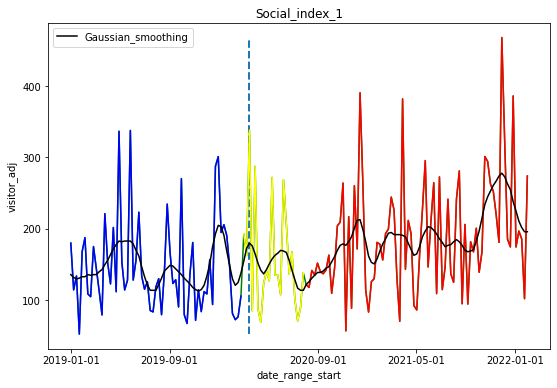

In [110]:
data = df6
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color = 'green')
sns.lineplot(x="date_range_start", y="visitor_adj", 
data=data[(data['date_range_start'] > '2018-11-30') & (data['date_range_start'] < '2020-03-01')], 
color='blue',ax = ax, ci = None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-03-01') & (data['date_range_start'] < '2020-08-01')], 
    color='yellow',ax = ax, ci=None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-08-01') & (data['date_range_start'] < '2023-01-01')], 
    color='red',ax = ax, ci = None)

# sns.lineplot(x = data['date'],y = data['7day_rolling_avg'],color = 'red', label = 'RollingAverage', ax = ax, ci = None)

sns.lineplot(x = data['date_range_start'],y = data['smoothed_visits'],color = 'black', label = 'Gaussian_smoothing', ax = ax, ci = None)

x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['visitor_adj'].min(), ymax=data['visitor_adj'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
# ax.set(ylim=(0, 800))
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Social_index_1')

Text(0.5, 1.0, 'Social_index_2')

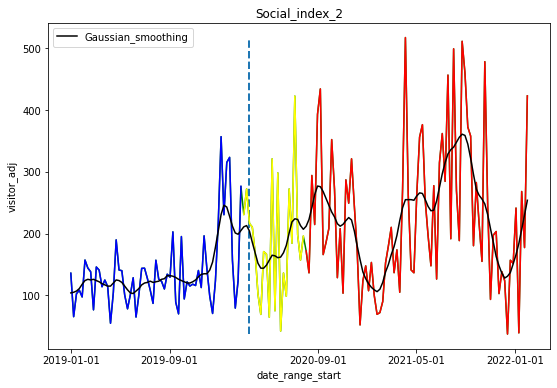

In [111]:
data = df7
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color = 'green')
sns.lineplot(x="date_range_start", y="visitor_adj", 
data=data[(data['date_range_start'] > '2018-11-30') & (data['date_range_start'] < '2020-03-01')], 
color='blue',ax = ax, ci = None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-03-01') & (data['date_range_start'] < '2020-08-01')], 
    color='yellow',ax = ax, ci=None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-08-01') & (data['date_range_start'] < '2023-01-01')], 
    color='red',ax = ax, ci = None)

# sns.lineplot(x = data['date'],y = data['7day_rolling_avg'],color = 'red', label = 'RollingAverage', ax = ax, ci = None)

sns.lineplot(x = data['date_range_start'],y = data['smoothed_visits'],color = 'black', label = 'Gaussian_smoothing', ax = ax, ci = None)

x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['visitor_adj'].min(), ymax=data['visitor_adj'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
# ax.set(ylim=(0, 800))
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Social_index_2')

Text(0.5, 1.0, 'Social_index_3')

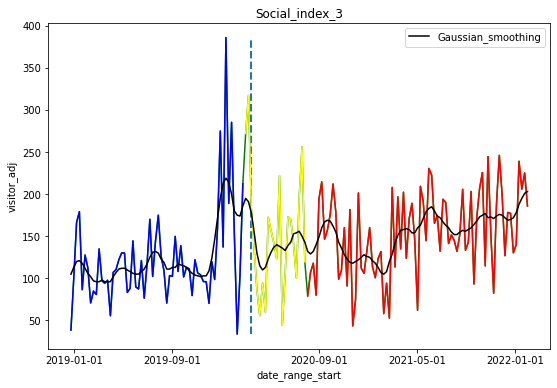

In [112]:
data = df8
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color = 'green')
sns.lineplot(x="date_range_start", y="visitor_adj", 
data=data[(data['date_range_start'] > '2018-11-30') & (data['date_range_start'] < '2020-03-01')], 
color='blue',ax = ax, ci = None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-03-01') & (data['date_range_start'] < '2020-08-01')], 
    color='yellow',ax = ax, ci=None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-08-01') & (data['date_range_start'] < '2023-01-01')], 
    color='red',ax = ax, ci = None)

# sns.lineplot(x = data['date'],y = data['7day_rolling_avg'],color = 'red', label = 'RollingAverage', ax = ax, ci = None)

sns.lineplot(x = data['date_range_start'],y = data['smoothed_visits'],color = 'black', label = 'Gaussian_smoothing', ax = ax, ci = None)

x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['visitor_adj'].min(), ymax=data['visitor_adj'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
# ax.set(ylim=(0, 800))
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Social_index_3')

Text(0.5, 1.0, 'Social_index_4')

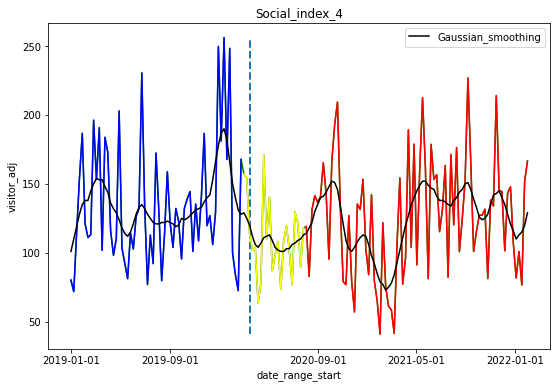

In [113]:
data = df9
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color = 'green')
sns.lineplot(x="date_range_start", y="visitor_adj", 
data=data[(data['date_range_start'] > '2018-11-30') & (data['date_range_start'] < '2020-03-01')], 
color='blue',ax = ax, ci = None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-03-01') & (data['date_range_start'] < '2020-08-01')], 
    color='yellow',ax = ax, ci=None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-08-01') & (data['date_range_start'] < '2023-01-01')], 
    color='red',ax = ax, ci = None)

# sns.lineplot(x = data['date'],y = data['7day_rolling_avg'],color = 'red', label = 'RollingAverage', ax = ax, ci = None)

sns.lineplot(x = data['date_range_start'],y = data['smoothed_visits'],color = 'black', label = 'Gaussian_smoothing', ax = ax, ci = None)

x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['visitor_adj'].min(), ymax=data['visitor_adj'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
# ax.set(ylim=(0, 800))
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Social_index_4')

Text(0.5, 1.0, 'Social_index_5')

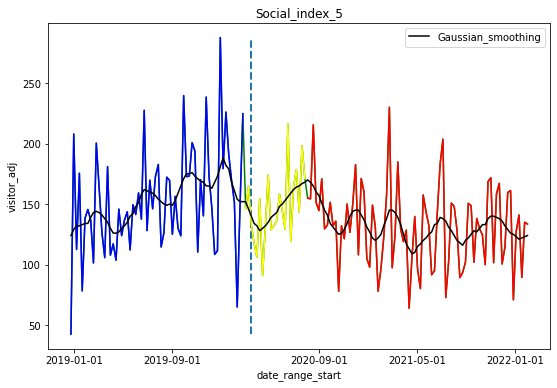

In [114]:
data = df0
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color = 'green')
sns.lineplot(x="date_range_start", y="visitor_adj", 
data=data[(data['date_range_start'] > '2018-11-30') & (data['date_range_start'] < '2020-03-01')], 
color='blue',ax = ax, ci = None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-03-01') & (data['date_range_start'] < '2020-08-01')], 
    color='yellow',ax = ax, ci=None)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=data[(data['date_range_start'] > '2020-08-01') & (data['date_range_start'] < '2023-01-01')], 
    color='red',ax = ax, ci = None)

# sns.lineplot(x = data['date'],y = data['7day_rolling_avg'],color = 'red', label = 'RollingAverage', ax = ax, ci = None)

sns.lineplot(x = data['date_range_start'],y = data['smoothed_visits'],color = 'black', label = 'Gaussian_smoothing', ax = ax, ci = None)

x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['visitor_adj'].min(), ymax=data['visitor_adj'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
# ax.set(ylim=(0, 800))
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Social_index_5')

Text(0.5, 1.0, 'Social_index')

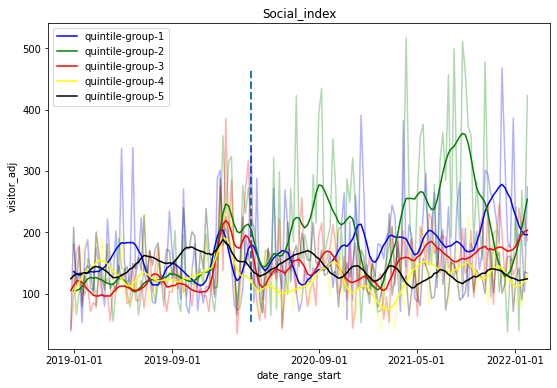

In [119]:
data = df6
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color='blue', alpha = 0.3)
sns.lineplot(x=df7['date_range_start'], y=df7["visitor_adj"],
             ax = ax, ci = None, color='green',alpha = 0.3)
    
sns.lineplot(x=df8["date_range_start"], y=df8["visitor_adj"],ax = ax, ci=None, color='red',alpha = 0.3)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=df9 ,ax = ax, ci = None, color='yellow',alpha = 0.3)

sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=df0 ,ax = ax, ci = None, color='black',alpha = 0.3)

sns.lineplot(data = df6, x = 'date_range_start',y = 'smoothed_visits',color = 'blue', ax = ax, ci = None, label = "quintile-group-1")
sns.lineplot(data = df7, x = 'date_range_start',y = 'smoothed_visits',color = 'green', ax = ax, ci = None, label = "quintile-group-2")
sns.lineplot(data = df8, x = 'date_range_start',y = 'smoothed_visits',color = 'red', ax = ax, ci = None, label = "quintile-group-3")
sns.lineplot(data = df9, x = 'date_range_start',y = 'smoothed_visits',color = 'yellow', ax = ax, ci = None, label = "quintile-group-4")
sns.lineplot(data = df0, x = 'date_range_start',y = 'smoothed_visits',color = 'black', ax = ax, ci = None, label = "quintile-group-5")
# sns.lineplot(x="date", y="real_scale", 
#     data=dfbh ,ax = ax, ci = None)


x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

# ax.set(ylim=(0, 200))
ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['visitor_adj'].min(), ymax=data['visitor_adj'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Social_index')

Text(0.5, 1.0, 'Material_index')

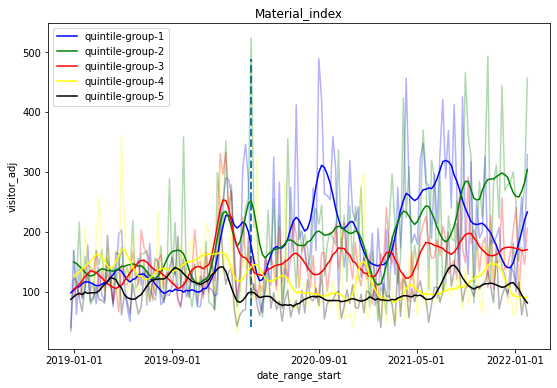

In [120]:
data = df1
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color='blue', alpha = 0.3)
sns.lineplot(x=df2['date_range_start'], y=df2["visitor_adj"],
             ax = ax, ci = None, color='green',alpha = 0.3)
    
sns.lineplot(x=df3["date_range_start"], y=df3["visitor_adj"],ax = ax, ci=None, color='red',alpha = 0.3)
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=df4 ,ax = ax, ci = None, color='yellow',alpha = 0.3)

sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=df5 ,ax = ax, ci = None, color='black',alpha = 0.3)

sns.lineplot(data = df1, x = 'date_range_start',y = 'smoothed_visits',color = 'blue', ax = ax, ci = None, label = "quintile-group-1")
sns.lineplot(data = df2, x = 'date_range_start',y = 'smoothed_visits',color = 'green', ax = ax, ci = None, label = "quintile-group-2")
sns.lineplot(data = df3, x = 'date_range_start',y = 'smoothed_visits',color = 'red', ax = ax, ci = None, label = "quintile-group-3")
sns.lineplot(data = df4, x = 'date_range_start',y = 'smoothed_visits',color = 'yellow', ax = ax, ci = None, label = "quintile-group-4")
sns.lineplot(data = df5, x = 'date_range_start',y = 'smoothed_visits',color = 'black', ax = ax, ci = None, label = "quintile-group-5")
# sns.lineplot(x="date", y="real_scale", 
#     data=dfbh ,ax = ax, ci = None)


x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)

# ax.set(ylim=(0, 200))
ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['visitor_adj'].min(), ymax=data['visitor_adj'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Material_index')

In [117]:
df_1 = df1.loc[(df1['date_range_start'] > '2020-03-01') & (df1['date_range_start'] < '2020-09-01')]
df_2 = df2.loc[(df2['date_range_start'] > '2020-03-01') & (df2['date_range_start'] < '2020-09-01')]
df_3 = df3.loc[(df3['date_range_start'] > '2020-03-01') & (df3['date_range_start'] < '2020-09-01')]
df_4 = df4.loc[(df4['date_range_start'] > '2020-03-01') & (df4['date_range_start'] < '2020-09-01')]
df_5 = df5.loc[(df5['date_range_start'] > '2020-03-01') & (df5['date_range_start'] < '2020-09-01')]

Text(0.5, 1.0, 'Material_index-2020')

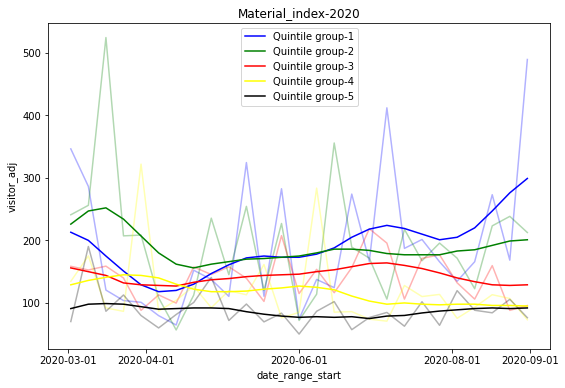

In [118]:
data = df_1
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date_range_start'],data['visitor_adj'],ax = ax,ci=None, color='blue',alpha = 0.3)
sns.lineplot(x=df_2['date_range_start'], y=df_2["visitor_adj"],
             ax = ax, ci = None , color='green',alpha = 0.3)
    
sns.lineplot(x=df_3["date_range_start"], y=df_3["visitor_adj"],ax = ax, ci=None,alpha = 0.3 , color='red')
    
sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=df_4 ,ax = ax, ci = None , color='yellow',alpha = 0.3)

sns.lineplot(x="date_range_start", y="visitor_adj", 
    data=df_5 ,ax = ax, ci = None, color='black',alpha = 0.3)

sns.lineplot(data = df_1, x = 'date_range_start',y = 'smoothed_visits',color = 'blue', ax = ax, ci = None,label="Quintile group-1")
sns.lineplot(data = df_2, x = 'date_range_start',y = 'smoothed_visits',color = 'green', ax = ax, ci = None,label="Quintile group-2")
sns.lineplot(data = df_3, x = 'date_range_start',y = 'smoothed_visits',color = 'red', ax = ax, ci = None,label="Quintile group-3")
sns.lineplot(data = df_4, x = 'date_range_start',y = 'smoothed_visits',color = 'yellow', ax = ax, ci = None,label="Quintile group-4")
sns.lineplot(data = df_5, x = 'date_range_start',y = 'smoothed_visits',color = 'black', ax = ax, ci = None,label="Quintile group-5")
# sns.lineplot(x="date", y="real_scale", 
#     data=dfbh ,ax = ax, ci = None)


x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)
ax.legend()
# ax.set(ylim=(0, 1500))

# ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['real_scale'].min(), ymax=data['real_scale'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Material_index-2020')

In [122]:
df_1 = dfbf.loc[(dfbf['date'] > '2020-03-01')]
df_2 = dfbg.loc[(dfbg['date'] > '2020-03-01')]
df_3 = dfbh.loc[(dfbh['date'] > '2020-03-01')]
df_4 = dfbi.loc[(dfbi['date'] > '2020-03-01')]
df_5 = dfbj.loc[(dfbj['date'] > '2020-03-01')]

NameError: name 'dfbf' is not defined

In [ ]:
data = df_1
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data['date'],data['scaled_visits_to_POI'],ax = ax,ci=None, color='blue', alpha = 0.3)
sns.lineplot(x=df_2['date'], y=df_2["scaled_visits_to_POI"],
             ax = ax, ci = None ,  color='green', alpha = 0.3)
    
sns.lineplot(x=df_3["date"], y=df_3["scaled_visits_to_POI"], alpha = 0.3,ax = ax, ci=None ,  color='red')
    
sns.lineplot(x="date", y="scaled_visits_to_POI", 
    data=df_4 ,ax = ax, ci = None , color='yellow', alpha = 0.3)

sns.lineplot(x="date", y="scaled_visits_to_POI", 
    data=df_5 ,ax = ax, ci = None, color='black', alpha = 0.3)

sns.lineplot(data = df_1, x = 'date',y = 'smoothed_visits',color = 'blue', ax = ax, ci = None,label="Quintile group-1")
sns.lineplot(data = df_2, x = 'date',y = 'smoothed_visits',color = 'green', ax = ax, ci = None,label="Quintile group-2")
sns.lineplot(data = df_3, x = 'date',y = 'smoothed_visits',color = 'red', ax = ax, ci = None,label="Quintile group-3")
sns.lineplot(data = df_4, x = 'date',y = 'smoothed_visits',color = 'yellow', ax = ax, ci = None,label="Quintile group-4")
sns.lineplot(data = df_5, x = 'date',y = 'smoothed_visits',color = 'black', ax = ax, ci = None,label="Quintile group-5")

# sns.lineplot(x="date", y="real_scale", 
#     data=dfbh ,ax = ax, ci = None)


x_values = ax.get_xticks()
x_len = len(x_values)
#     print(x_len)
ax.set(ylim=(0, 1500))

ax.legend()
# ax.vlines(x=[datetime(2020, 3, 16)], ymin=data['real_scale'].min(), ymax=data['real_scale'].max(), colors=['tab:blue','tab:orange','tab:grey'],label = "2020-03-02", ls='--', lw=2)

new_x = [x_values[i] for i in [0,x_len //4,2*x_len //4,3*x_len //4, -1]]
ax.set_xticks(new_x)
#     plt.ylim(0, max_value)  # set y-lim with max of the value column; makes it easier to compare countries
plt.title('Social_index from 2020')